In [8]:
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt
import xarray as xr              #library to read in and process Earth system data in NetCDF files
import cartopy.crs as ccrs       #library to handle maps
import cartopy.feature as cfeature
from pandas.plotting import register_matplotlib_converters #function used in plotting when converting NetCDF data to dates
register_matplotlib_converters() #needed to facilitate conversion of dates in netCDF files
%matplotlib inline

# **FINAL PROJECT CODE**

**Question:** Is particulate matter and precipitation correlated over California during the years 2000-2010?  

# TESTING DATA

<xarray.DataArray 'PM25' (LAT: 4550, LON: 9300)>
[42315000 values with dtype=float32]
Coordinates:
  * LON      (LON) float64 -138.0 -138.0 -138.0 -138.0 ... -45.02 -45.02 -45.01
  * LAT      (LAT) float64 68.0 67.98 67.97 67.97 ... 22.54 22.52 22.52 22.5
Attributes:
    standard_name:  PM25
    units:          ug/m3


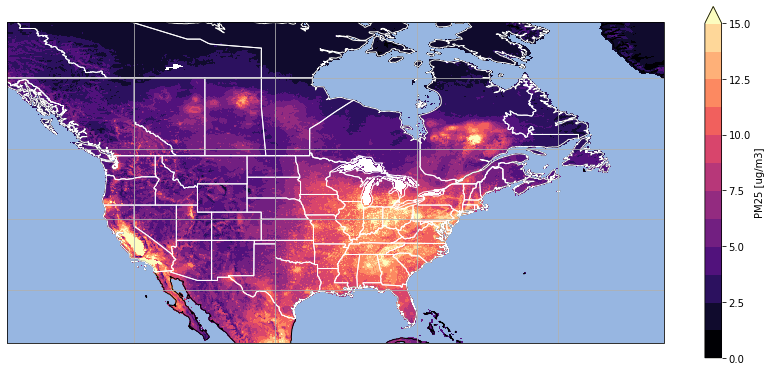

In [28]:
pm25_2002 = pm_load(2002)
print(pm25_2002)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor = 'white')
pm25_2002.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cmap='magma',levels=13, vmin=0,vmax=15)
plt.subplots_adjust(left=0.1, right=2, top=1.3, bottom=.08)

In [412]:
def precip_load_ca(year):
    path = '/home/mzhang33/AOS90/Data/precip/'
    year = str(year)
    precip_file = xr.open_dataset(path + 'precip.' + year + '.nc')
    precip = precip_file['precip']
    precip_annual = precip.mean(dim='time')
    precip_ca = precip_annual.sel(lat = slice(42,32),lon = slice(234,246.25))
    return precip_ca

In [295]:
precip2001 = precip_load_ca(2001)
print(precip2001)

<xarray.DataArray 'precip' (lat: 20, lon: 48)>
array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan, 3.771916  , 3.3220024 ,
        2.2944307 , 1.2454056 , 1.273504  , 1.7280555 , 0.92338884,
        0.9549854 , 1.369623  , 0.9330774 , 0.5086014 , 0.52764606,
        0.66307104, 0.8864763 , 0.9543553 , 1.1592736 , 1.3015858 ,
        0.962677  , 1.1061739 , 0.7570848 , 0.64497626, 0.7898404 ,
        0.5848539 , 0.5794381 , 0.7717616 ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,     

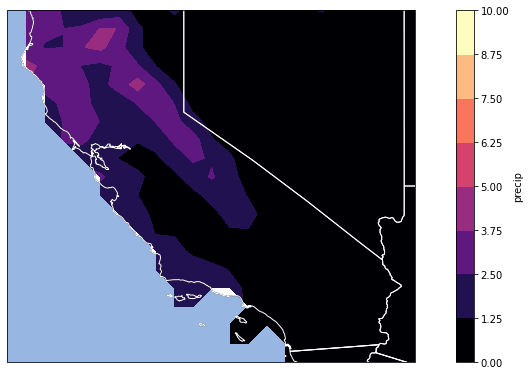

In [413]:
precip2001 = precip_load_ca(2001)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor = 'white')
precip2001.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cmap='magma',levels=9, vmin=0,vmax=10)
plt.subplots_adjust(left=0.1, right=2, top=1.3, bottom=.08)

In [404]:
# -124.848633,32.670208,-114.125977,42.174261
# ug/m3
def pm_load_ca(year):
    path = '/home/mzhang33/AOS90/Data/pm25/'
    year = str(year)
    pm25_file = xr.open_dataset(path + 'V4NA03_PM25_NA_'+ year + '01_' + year + '12-RH35.nc')
    pm25 = pm25_file['PM25']
    pm25_ca = pm25.sel(LAT = slice(42,32), LON = slice(-126,-114))
    return pm25_ca

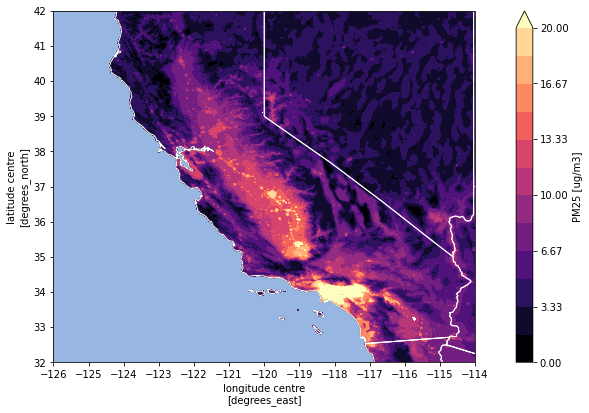

In [405]:
# loading in the sliced data for 
pm25_ca = pm_load_ca(2001)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor = 'white')
pm25_ca.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cmap='magma',levels=13, vmin=0,vmax=20)
ax.set_xticks(np.linspace(-126,-114,13),crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(42,32,11),crs=ccrs.PlateCarree()) 
plt.subplots_adjust(left=0.1, right=2, top=1.3, bottom=.08)

In [340]:
# function to find the average over the box of California for one file
def annual_avg_ca_pm25(year):
    path = '/home/mzhang33/AOS90/Data/pm25/'
    year = str(year)
    pm25_file = xr.open_dataset(path + 'V4NA03_PM25_NA_'+ year + '01_' + year + '12-RH35.nc')
    pm25 = pm25_file['PM25']
    pm25_ca = pm25.sel(LAT = slice(42,32), LON = slice(-125,-115))
    pm25_mean_ca = pm25_ca.mean(dim=('LON','LAT'))
    pm25_mean_ca_val = pm25_mean_ca.values
    float_pm25 = pm25_mean_ca_val.astype(np.float32)
    return float_pm25

In [357]:
# putting the average for box for a year
annual_avg_ca_pm25_a = []
for i in range(2000,2010,1):
    avg_ca = annual_avg_ca_pm25(i)
    annual_avg_ca_pm25_a.append(avg_ca)
print(annual_avg_ca_pm25_a)

[array(5.887041, dtype=float32), array(5.3113704, dtype=float32), array(7.306802, dtype=float32), array(5.5678916, dtype=float32), array(5.1429496, dtype=float32), array(5.4430294, dtype=float32), array(5.371557, dtype=float32), array(5.9293694, dtype=float32), array(6.5312357, dtype=float32), array(5.1349673, dtype=float32)]


In [365]:
def annual_avg_ca_precip(year):
    path = '/home/mzhang33/AOS90/Data/precip/'
    year = str(year)
    precip_file = xr.open_dataset(path + 'precip.' + year + '.nc')
    precip = precip_file['precip']
    precip_annual = precip.mean(dim='time')
    precip_ca = precip_annual.sel(lat = slice(42,32),lon = slice(224,246.25))
    precip_mean_ca = precip_ca.mean(dim=('lon','lat'))
    precip_mean_ca_val = precip_mean_ca.values
    float_precip = precip_mean_ca_val.astype(np.float32)
    return float_precip

In [364]:
### AVG PRECIP ARRAY MAKER
annual_avg_ca_precip_a = []
for i in range(2000,2010,1):
    avg_ca = annual_avg_ca_precip(i)
    annual_avg_ca_precip_a.append(avg_ca)
print(annual_avg_ca_precip_a)

[array(1.0376887, dtype=float32), array(1.054735, dtype=float32), array(0.83475804, dtype=float32), array(1.0252202, dtype=float32), array(1.1082543, dtype=float32), array(1.4914801, dtype=float32), array(1.0578058, dtype=float32), array(0.74236566, dtype=float32), array(0.91894, dtype=float32), array(0.9199304, dtype=float32)]


Text(0.5, 1.0, 'Comparision of Annual Average Precipitation and PM2.5 Concentrations over California from 2000-2010')

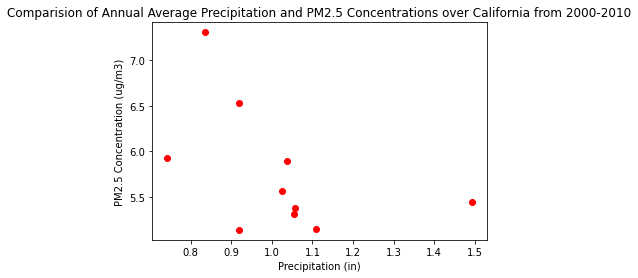

In [446]:
### GRAPH THAT SHOWS PRECIP VS PM25
x = annual_avg_ca_precip_a
y = annual_avg_ca_pm25_a
plt.scatter(x,y, color = 'red')
plt.xlabel('Precipitation (in)')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.title('Comparision of Annual Average Precipitation and PM2.5 Concentrations over California from 2000-2010')

In [2]:
### FINDING CORRELATION ###
def stats_af(x,y):
    (r, pval) = ss.pearsonr(x,y)
    r_2 = r*r
    
    # find the mean for both x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # calculate following the formula for the line of best fit
    slope_numerator = np.sum((x - x_mean)*(y - y_mean))
    slope_denominator = np.sum((x - x_mean)**2)
    
    # find line of best fit
    slope = (slope_numerator/slope_denominator)
    y_int = y_mean - (x_mean)*(slope)
    
    # calculate following the formula for standard error 
    slope_se_num = np.sum((y - y_mean)**2)
    slope_se_denom = np.sum((x - x_mean)**2)
    n = len(x) # how many values in sample
    
    slope_se_multi = 1/(n-2)
    slope_se = math.sqrt(slope_se_multi * (slope_se_num/slope_se_denom))
    
    return slope, y_int, slope_se, r, pval, r_2

In [451]:
slope, y_int, slope_se, r, pval = stats_af(x,y)
print(stats_af(x,y))

(-1.5955486, 7.3886733, 1.2130789741066896, -0.46502465049173525, 0.1756628087393773)


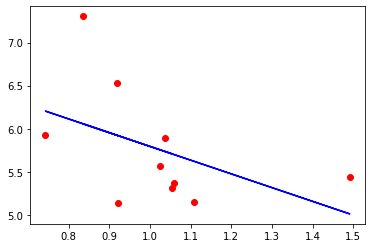

In [450]:
### GRAPH WITH LINE OF BEST FIT
x = annual_avg_ca_precip_a
y = annual_avg_ca_pm25_a
plt.scatter(x,y, color = 'red')

# convert into array
x2 = np.array(x)
# apply the line of best fit
y_fit = y_int + slope*(x2)

plt.plot(x,y_fit, color ='blue')
plt.xlabel('Precipitation (in)')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.title('Comparision of Annual Average Precipitation and PM2.5 Concentrations over California from 2000-2010')

In [280]:
def annual_avg_ca_pm25(year):
    path = '/home/mzhang33/AOS90/Data/pm25/'
    year = str(year)
    pm25_file = xr.open_dataset(path + 'V4NA03_PM25_NA_'+ year + '01_' + year + '12-RH35.nc')
    pm25 = pm25_file['PM25']
    pm25_ca = pm25.sel(LAT = slice(42,32), LON = slice(-125,-115))
    pm25_mean_ca = pm25_ca.mean(dim=('LON','LAT'))
    pm25_mean_ca_val = pm25_mean_ca.values
    return float_pm25

# INDIVIDUAL FUNCTIONS

In [368]:
        #### #### pm25 #### ####
#### grid function for average over area ####

# put higher value first for lat 
# put lower value first for long

def annual_avg_ca_pm25_grid(year,lat1,lat2,long1,long2):
    path = '/home/mzhang33/AOS90/Data/pm25/'
    year = str(year)
    pm25_file = xr.open_dataset(path + 'V4NA03_PM25_NA_'+ year + '01_' + year + '12-RH35.nc')
    pm25 = pm25_file['PM25']
    pm25_ca = pm25.sel(LAT = slice(lat1,lat2), LON = slice(long1,long2))
    pm25_mean_ca = pm25_ca.mean(dim=('LON','LAT'))
    pm25_mean_ca_val = pm25_mean_ca.values
    return pm25_mean_ca_val

In [378]:
        #### #### pm25 #### ####
#### grid function for loading in data for an area ####

def pm25_grid(year,lat1,lat2,long1,long2):
    path = '/home/mzhang33/AOS90/Data/pm25/'
    year = str(year)
    pm25_file = xr.open_dataset(path + 'V4NA03_PM25_NA_'+ year + '01_' + year + '12-RH35.nc')
    pm25 = pm25_file['PM25']
    pm25_ca = pm25.sel(LAT = slice(lat1,lat2), LON = slice(long1,long2))
    return pm25_ca

In [591]:
        #### #### precip #### ####
#### grid function for loading in data for an area ####

def precip_load_ca(year, lat1, lat2, long1, long2):
    path = '/home/mzhang33/AOS90/Data/precip/'
    year = str(year)
    precip_file = xr.open_dataset(path + 'precip.' + year + '.nc')
    precip = precip_file['precip']
    precip_annual = precip.mean(dim='time')
    precip_ca = precip_annual.sel(lat = slice(lat1,lat2),lon = slice(long1,long2))
    return precip_ca

In [396]:
def annual_avg_ca_precip(year):
    path = '/home/mzhang33/AOS90/Data/precip/'
    year = str(year)
    precip_file = xr.open_dataset(path + 'precip.' + year + '.nc')
    precip = precip_file['precip']
    precip_annual = precip.mean(dim='time')
    precip_ca = precip_annual.sel(lat = slice(42,32),lon = slice(224,246.25))
    precip_mean_ca = precip_ca.mean(dim=('lon','lat'))
    precip_mean_ca_val = precip_mean_ca.values
    float_precip = precip_mean_ca_val.astype(np.float32)
    return float_precip

# GRID FUNCTIONS (COMBINES ALL PREVIOUS FUNCTIONS)

- lat1, lat2 - latitude coordinates
- long1, long2 - longitude coordinates
- year - the year for file name
- **returns -> data set that contains 10 values (2000-2010) for the average over the selected area**

In [4]:
### VALUES FOR PM25 AVERAGES ###
def grid_pm25(lat1,lat2,long1,long2):
    path = '/home/mzhang33/AOS90/Data/pm25/'
    lat1 = lat1
    lat2 = lat2
    long1 = long1
    long2 = long2

    def pm25_mean(year,lat1,lat2,long1,long2):
        year = str(year)
        pm25_file = xr.open_dataset(path + 'V4NA03_PM25_NA_'+ year + '01_' + year + '12-RH35.nc')
        pm25 = pm25_file['PM25']
        pm25_ca = pm25.sel(LAT = slice(lat1,lat2), LON = slice(long1,long2))
        pm25_mean_ca = pm25_ca.mean(dim=('LON','LAT'))
        pm25_mean_ca_val = pm25_mean_ca.values
        return pm25_mean_ca_val

    annual_avg_a = []
    for i in range(2000,2011,1):
        avg_pm25 = pm25_mean(i,lat1,lat2,long1,long2)
        annual_avg_a.append(avg_pm25)

    return annual_avg_a

In [5]:
### VALUES FOR PRECIPITATION AVERAGES ###
def grid_precip(lat1,lat2,long1,long2):
    lat1 = lat1
    lat2 = lat2
    long1 = long1
    long2 = long2
    
    def precip_mean(year,lat1,lat2,long1,long2):
        path = '/home/mzhang33/AOS90/Data/precip/'
        year = str(year)
        precip_file = xr.open_dataset(path + 'precip.' + year + '.nc')
        precip = precip_file['precip']
        precip_annual = precip.mean(dim='time')
        precip_ca = precip_annual.sel(lat = slice(lat1,lat2),lon = slice(long1,long2))
        precip_mean_ca = precip_ca.mean(dim=('lon','lat'))
        precip_mean_ca_val = precip_mean_ca.values
        float_precip = precip_mean_ca_val.astype(np.float32)
        return float_precip

    annual_avg_a = []
    for i in range(2000,2011,1):
        avg_precip = precip_mean(i,lat1,lat2,long1,long2)
        annual_avg_a.append(avg_precip)

    return annual_avg_a

correlation(r): -0.27056148335046903 r_2: 0.07320351627280614 p-value: 0.4209972852250319


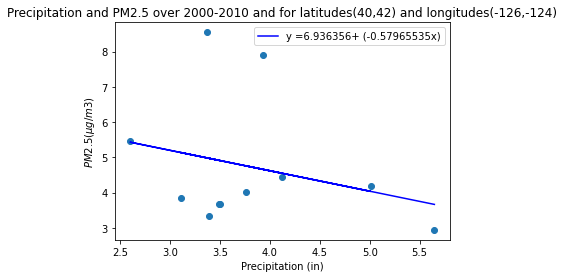

In [29]:
### making graphs & correlations
def correlation(lat1,lat2,long1a,long2a,long1b,long2b):
    x = grid_precip(lat1,lat2,long1b,long2b)
    y = grid_pm25(lat1,lat2,long1a,long2a)
    statistics = stats_af(x,y)
    slope = statistics[0]
    y_int = statistics[1]
    x2 = np.array(x)
    y_fit = y_int + slope*(x2)
    plt.scatter(x,y)
    plt.plot(x,y_fit, color ='blue', label = 'y =' + str(y_int) + '+ (' + str(slope) + 'x)')
    plt.title('Precipitation and PM2.5 over 2000-2010 and for latitudes'+ '('+ str(lat2)+','+str(lat1)+
              ') and longitudes' + '(' + str(long1a) + ',' + str(long2a)+')')
    plt.legend()
    plt.xlabel('Precipitation (in)')
    plt.ylabel('$PM2.5 (\mu g/m3)$')
    return print('correlation(r):', statistics[3],'r_2:', statistics[5],'p-value:', statistics[4])

def corr(lat1,lat2,long1a,long2a,long1b,long2b):
    x = grid_precip(lat1,lat2,long1b,long2b)
    y = grid_pm25(lat1,lat2,long1a,long2a)
    statistics = stats_af(x,y)
    return statistics[3]

correlation(42,40,-126,-124,234,236)

# FINDING DATA AND CORRELATION FOR EACH GRID

[array(3.6644776, dtype=float32), array(3.334238, dtype=float32), array(7.901551, dtype=float32), array(4.4286165, dtype=float32), array(4.0119214, dtype=float32), array(4.1826262, dtype=float32), array(5.463242, dtype=float32), array(3.683329, dtype=float32), array(8.547759, dtype=float32), array(3.842355, dtype=float32), array(2.9385512, dtype=float32)]
[array(3.5000684, dtype=float32), array(3.388763, dtype=float32), array(3.9294658, dtype=float32), array(4.125144, dtype=float32), array(3.7587593, dtype=float32), array(5.010021, dtype=float32), array(2.6004982, dtype=float32), array(3.4886527, dtype=float32), array(3.367517, dtype=float32), array(3.1070678, dtype=float32), array(5.6476593, dtype=float32)]
correlation(r): -0.27056148335046903 r_2: 0.07320351627280614 p-value: 0.4209972852250319


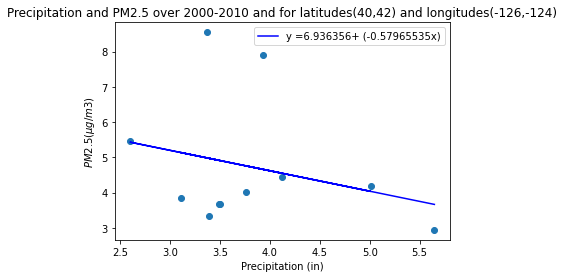

In [30]:
### grid 1 
# lat = 42, 40
# lon (pm) = -126, -124
# lon (p) = 234, 236

print(grid_pm25(42,40,-126,-124))
print(grid_precip(42,40,234,236))
correlation(42,40,-126,-124,234,236)

correlation(r): -0.2693789836741735 r_2: 0.07256503684533064 p-value: 0.4231097639750489


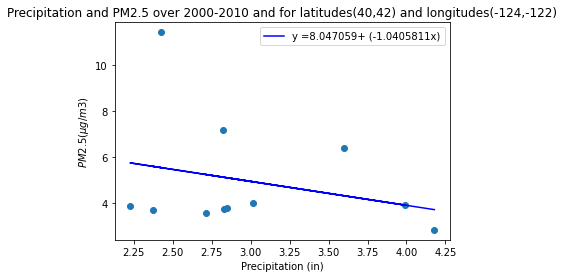

In [31]:
### grid 2 
# lat = 42, 40
# lon (pm) = -124, -122
# lon (p) = 236, 238

correlation(42,40,-124,-122,236,238)

correlation(r): -0.6719571354909359 r_2: 0.451526391937184 p-value: 0.023531413563566934


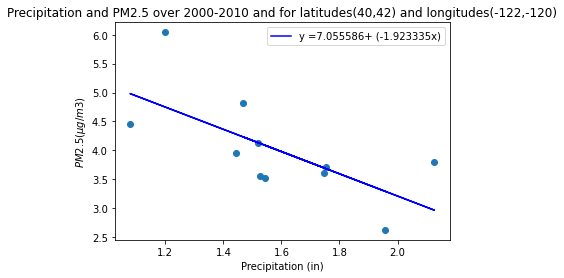

In [32]:
### grid 3
# lat = 42, 40
# lon = -122, -120 
# lon2 = 238, 240
correlation(42,40,-122,-120,238,240)

correlation(r): -0.38566831390899814 r_2: 0.14874004835340954 p-value: 0.24142673732120973


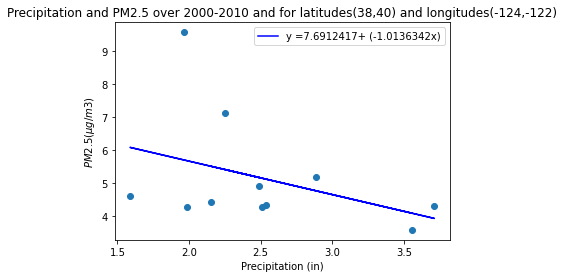

In [33]:
### grid 4
# lat = 40,38
# lon1 = -124, -122
# lon2 = 236, 238
correlation(40,38,-124,-122,236,238)

correlation(r): -0.6773553945134525 r_2: 0.4588103304764749 p-value: 0.02203091448013727


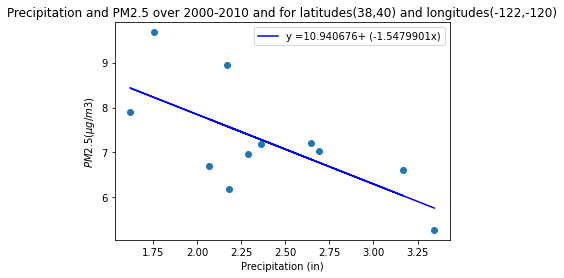

In [34]:
### grid 5
# lat = 40, 38
# lon1 = -122, -120
# lon2 = 238, 240
correlation(40,38,-122,-120,238,240)

correlation(r): -0.597703443048296 r_2: 0.35724940583178766 p-value: 0.05213304898474612


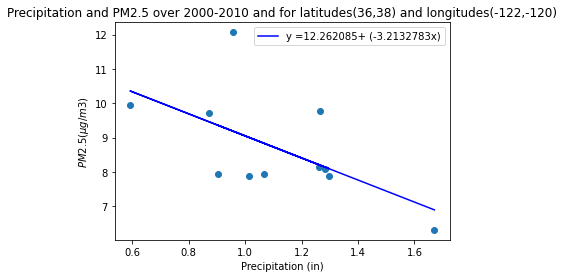

In [35]:
### grid 6
# lat = 38, 36
# lon1 = (-122, 120)
# lon2 = (238, 240)
correlation(38,36,-122,-120,238,240)

correlation(r): -0.686563788761734 r_2: 0.47136983603886684 p-value: 0.01963033736815456


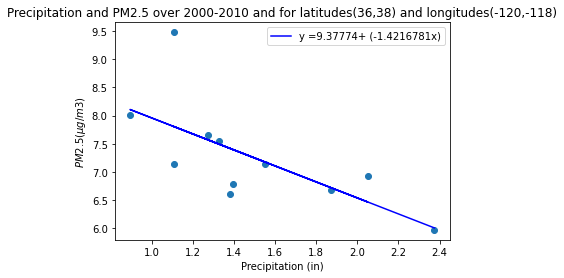

In [36]:
### grid 7
# lat = 38, 36
# lon1 = (-120, -118)
# lon2 = (240, 242)
correlation(38,36,-120,-118,240,242)

correlation(r): -0.6708129061998565 r_2: 0.4499899551242974 p-value: 0.023858535419620852


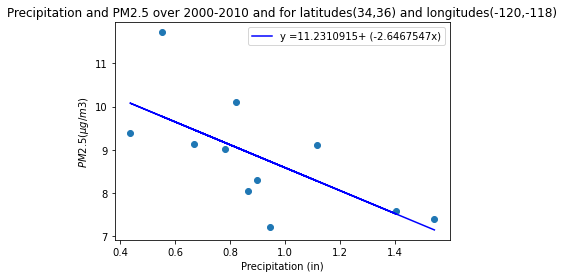

In [37]:
### grid 8
# lat = 36, 34
# lon1 = (-120, -118)
# lon2 = (240, 242)
correlation(36,34,-120,-118,240,242)

correlation(r): -0.3315571016677237 r_2: 0.10993011166630125 p-value: 0.31922212774933956


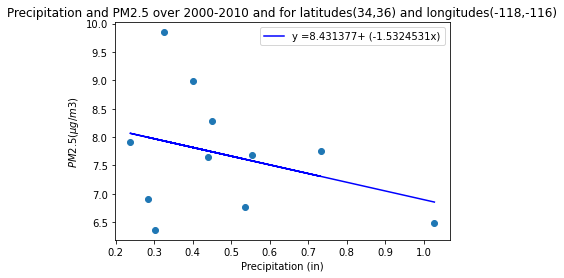

In [38]:
### grid 9
# lat = 36, 34
# lon1 = (-118, -116)
# lon2 = (242, 244)
correlation(36,34,-118,-116,242,244)

correlation(r): -0.47338480922624543 r_2: 0.2240931776061688 p-value: 0.141367730071424


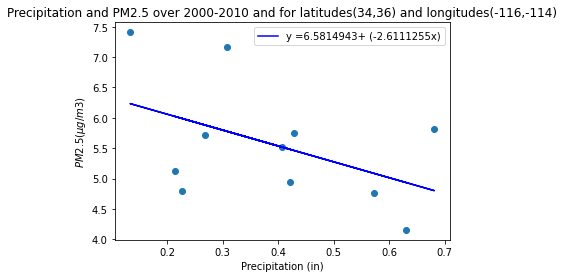

In [39]:
### grid 10
# lat = 36, 34
# lon1 = (-116, -114)
# lon2 = (244, 246)
correlation(36,34,-116,-114,244,246)

correlation(r): -0.6122220631594129 r_2: 0.3748158546191681 p-value: 0.04527205048371383


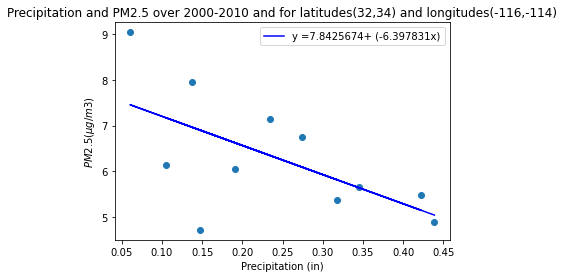

In [40]:
### grid 11
# lat = 34, 32
# lon1 = (-118, -116)
# lon2 = (244, 246)
correlation(34,32,-116,-114,244,246)

correlation(r): -0.4401949244916786 r_2: 0.1937715715482346 p-value: 0.17543682639621228


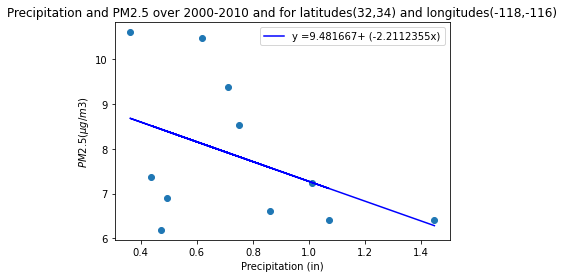

In [41]:
### grid 12
# lat = 34, 32
# lon1 = (-116, -114)
# lon2 = (242, 244)
correlation(34,32,-118,-116,242,244)

In [556]:
# making test array 
western_most_point = 42
eastern_most_point = 40
southest_point = -124
northern_point = -122
size = 2 
lon = np.linspace(western_most_point, eastern_most_point, size)
lat = np.linspace(southest_point, northern_point, size)
lon2d, lat2d = np.meshgrid(lon, lat) #creates coordinate matrices (n_lon x n_lat) from the coordinate vectors 
#your data after doing xr.DataArray...


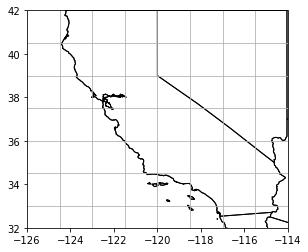

In [615]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
lon, lat = np.meshgrid(np.linspace(-126,-114, 6), np.linspace(32, 42, 5))
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.set_extent([-124, -122, 32, 42])
ax.set_xticks(np.linspace(-126,-114, 7))
ax.set_yticks(np.linspace(32,42,6))
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)
# da.plot.pcolormesh("lon", "lat")
lon2d, lat2d = np.meshgrid(lon, lat)
ax.plot(r_data)